# Ejercicio 1

Se le brinda el siguiente se de datos `clusterable_data.npy` al cual debe de resolver mediante los métodos de K-Means, DBSCAN y HDBSCAN

In [78]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import skillsnetwork

In [33]:
df_cluster = pd.DataFrame(np.load('clusterable_data.npy'),
                          columns=['x', 'y'])
df_cluster[:5]

,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


<Axes: xlabel='x', ylabel='y'>

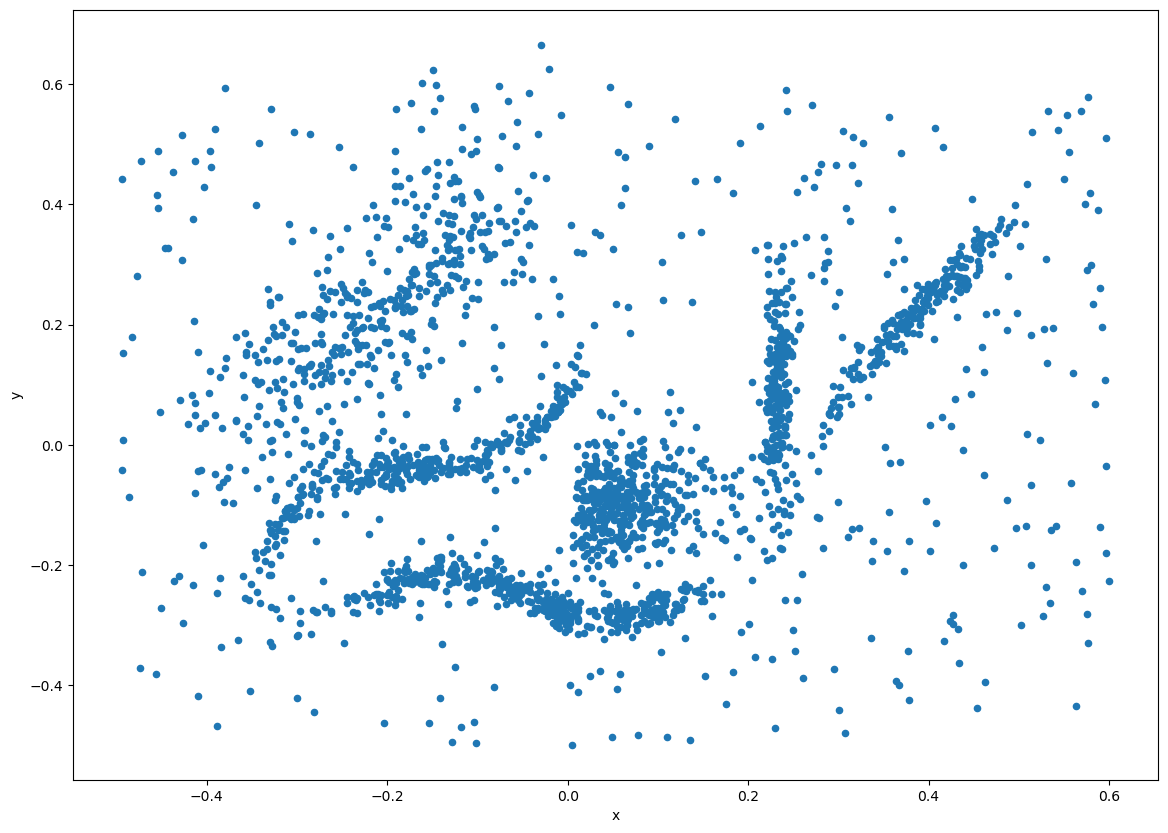

In [34]:
df_cluster.plot(kind='scatter',
               x='x',
               y='y',
               figsize=(14,10))

## K-Means

In [35]:
 kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

c:\Users\Joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='x', ylabel='y'>

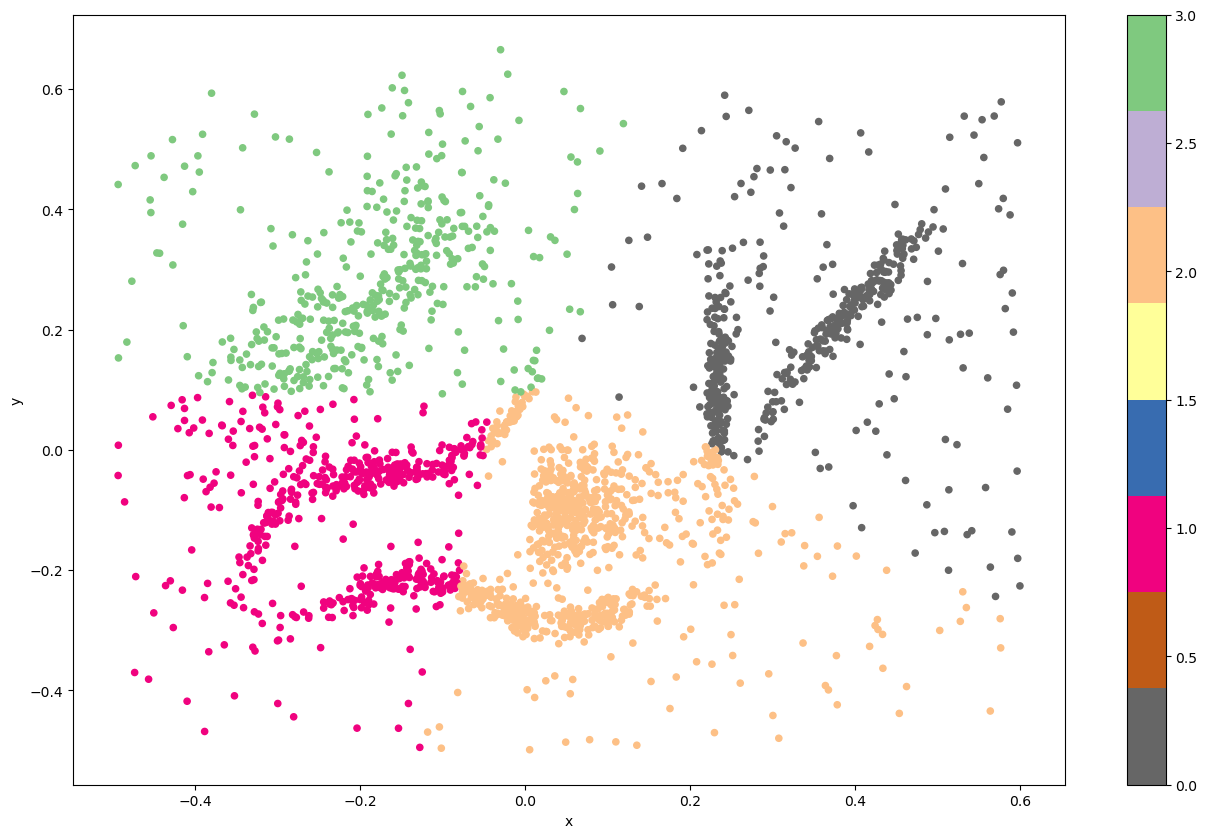

In [ ]:
kmeans = KMeans(4) #TODO

kmeans.fit(df_cluster) #TODO
y_kmeans = kmeans.predict(df_cluster) #TODO
df_cluster.plot(kind='scatter', 
                x='x', 
                y='y', 
                c=y_kmeans, 
                cmap='Accent_r', figsize=(16,10))

## DBSCAN

In [ ]:
dbscan =DBSCAN(eps=0.033, min_samples=22, algorithm='brute', p=0.9)
preds = dbscan.fit_predict(df_cluster) #TODO 

<Axes: xlabel='x', ylabel='y'>

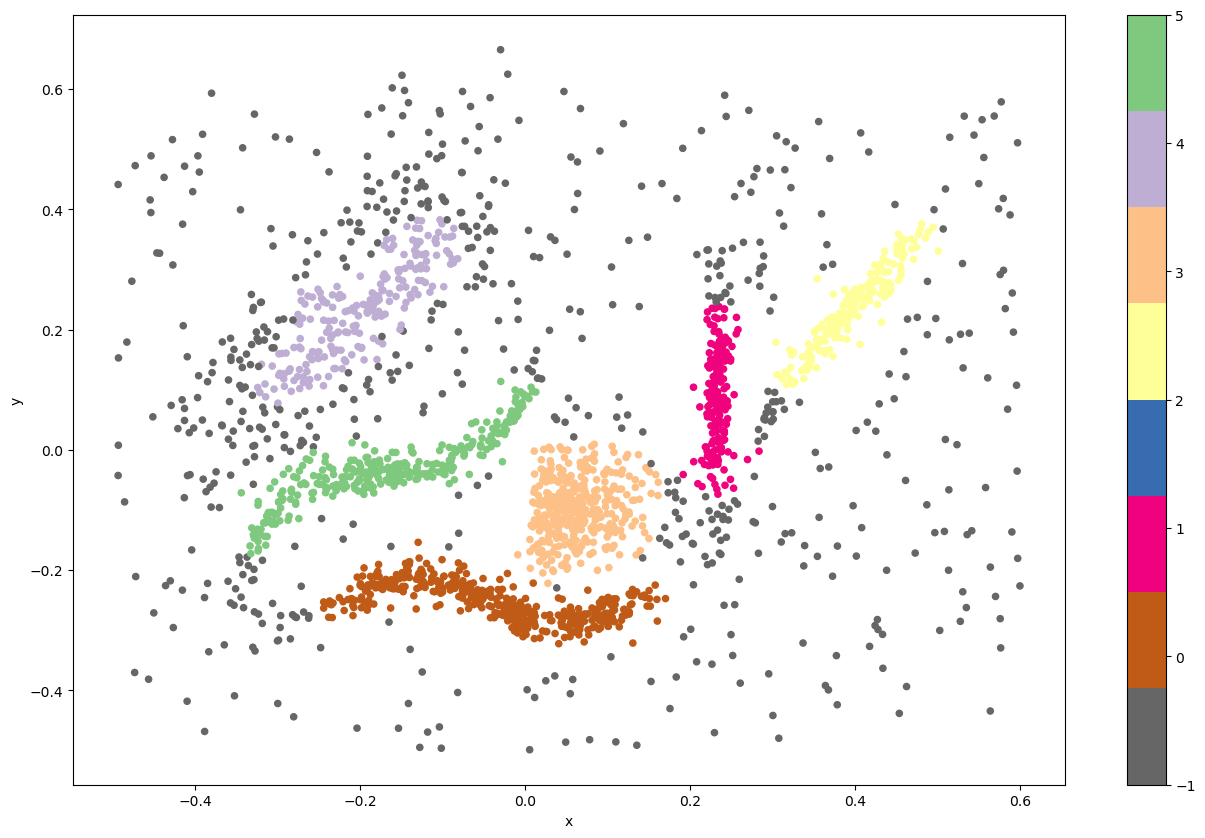

In [ ]:
df_cluster.plot(kind='scatter', 
                x='x', 
                y='y', 
                c=preds, 
                cmap='Accent_r', figsize=(16,10)) 

# HDBSCAN

In [ ]:
from hdbscan import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
preds_2 = hdbscan.fit_predict(df_cluster)

<Axes: xlabel='x', ylabel='y'>

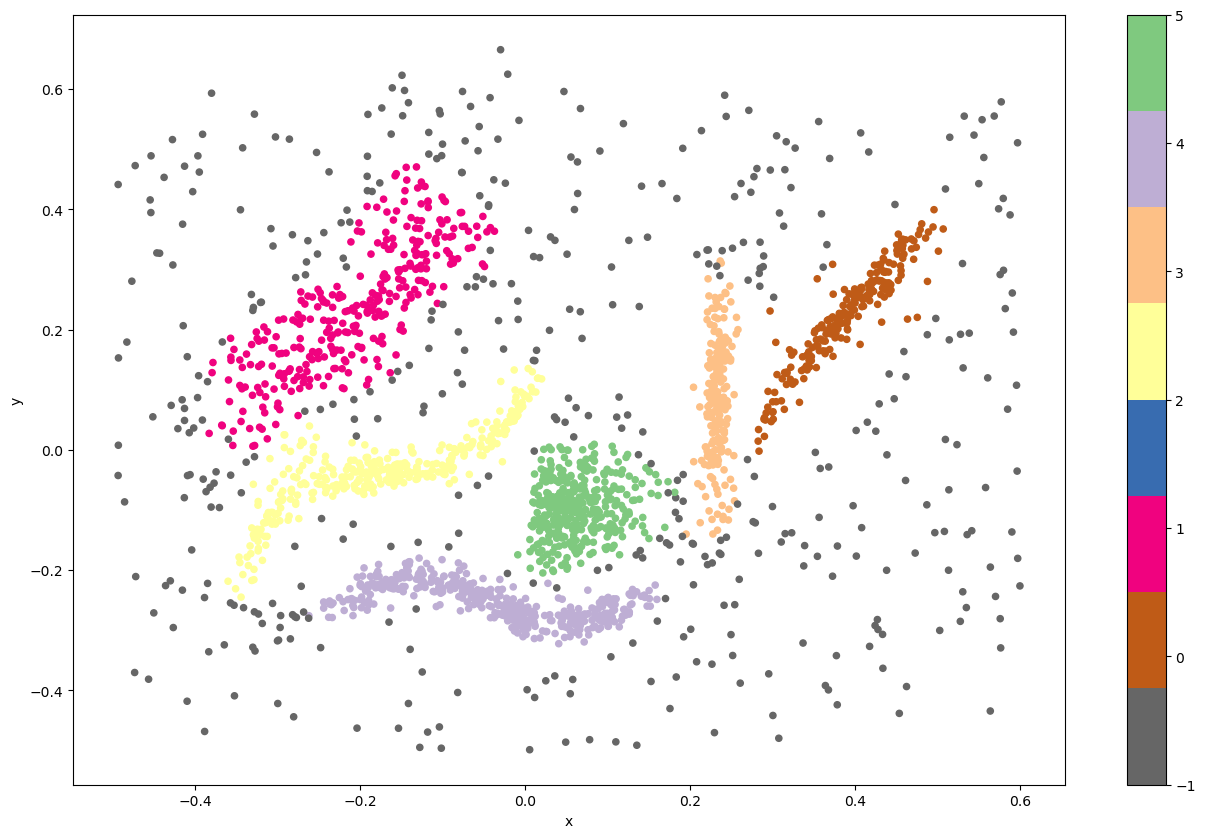

In [ ]:
df_cluster.plot(kind='scatter', 
                x='x', 
                y='y', 
                c=preds_2, 
                cmap='Accent_r', 
                figsize=(16,10)) #TODO parámetro c=

## Conclusiones del algoritmo HDBSCAN.

### Ventajas:

- Es uno de los algoritmos más potentes para cluster.
- Los clústeres (en este algoritmo se llaman componentes) no tienen que ser esféricos
- Con los hiperparámetros, el modelo infiere el clúster, no necesitamos pasar una cantidad de clústeres.
- Es muy robusto con valores atípicos.
- El algoritmo descarta los puntos que no satisfacen las necesidades de densidad y distancia (los puntos grises)
- Como puede ver, los grupos tienen diferente densidad.

### Contras

- No es determinista, las soluciones serán diferentes en cada tren.

## Mean shift (Segmentación de imágenes)

In [ ]:
pip install opencv-python

In [81]:
import requests 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

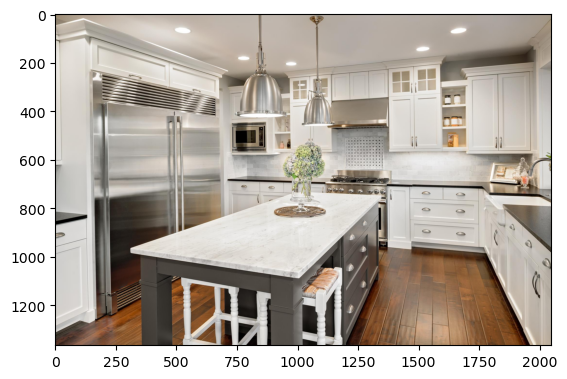

In [ ]:
name='my_file.jpg'
img = cv.imread(name)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

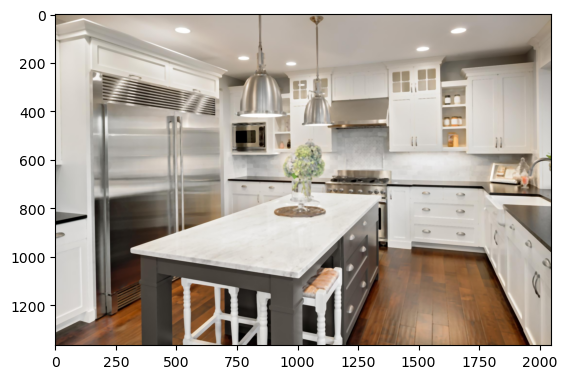

In [ ]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
X = img.reshape((-1,3)) #TODO 
X = np.float32(X) #TODO 

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000) #TODO 
ms =MeanShift(bandwidth=bandwidth, 
               bin_seeding=True) #TODO
ms.fit(X) #TODO
labeled= ms.labels_ #TODO 
cluster_int8=np.uint8(ms.cluster_centers_)
result=np.zeros(X.shape,dtype=np.uint8)

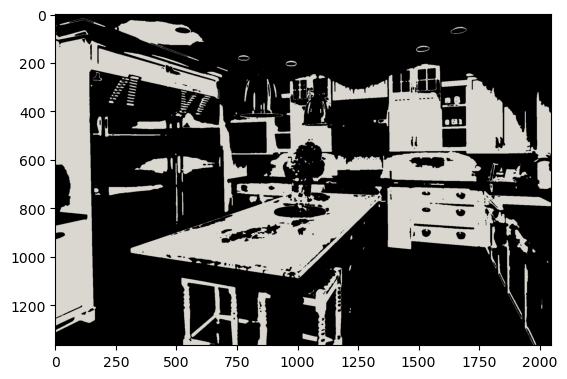

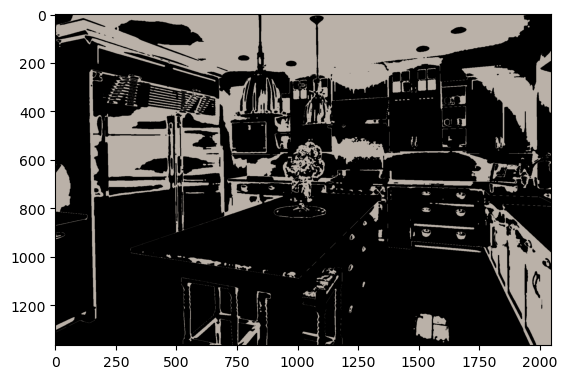

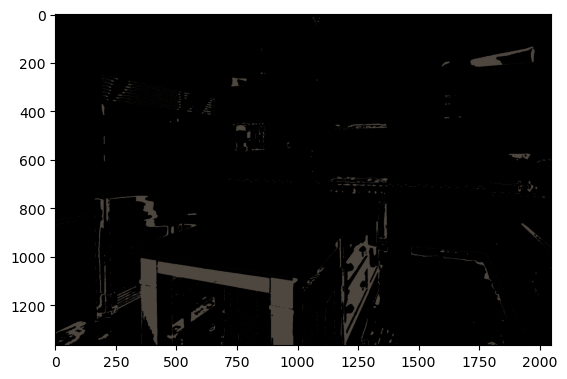

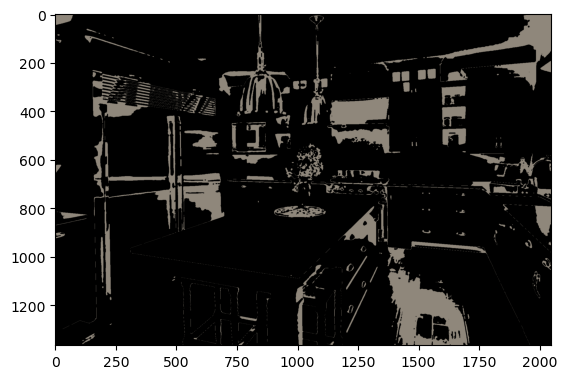

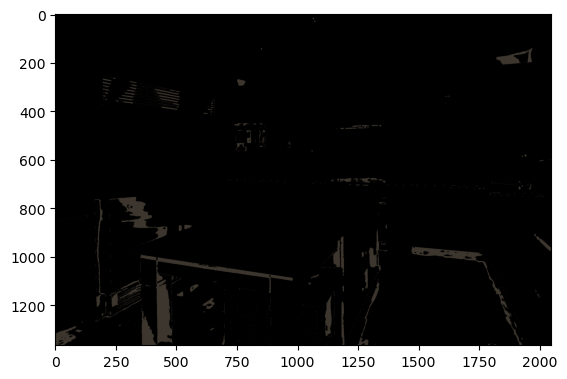

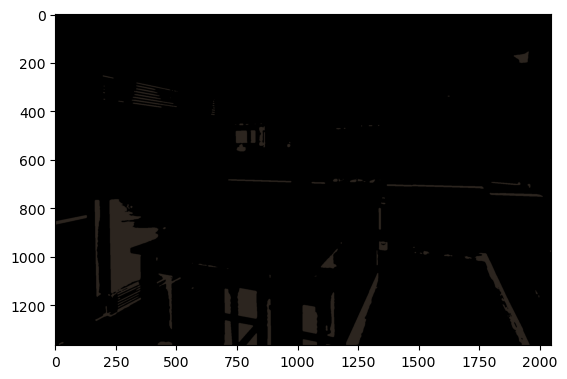

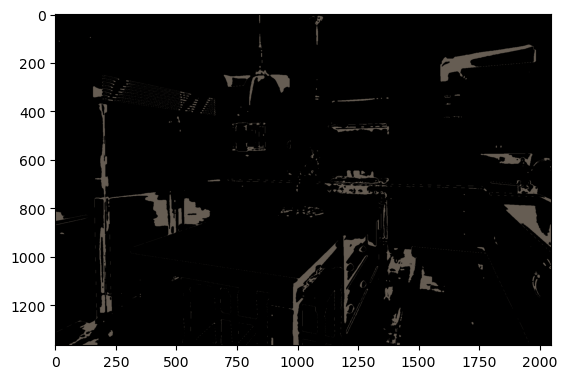

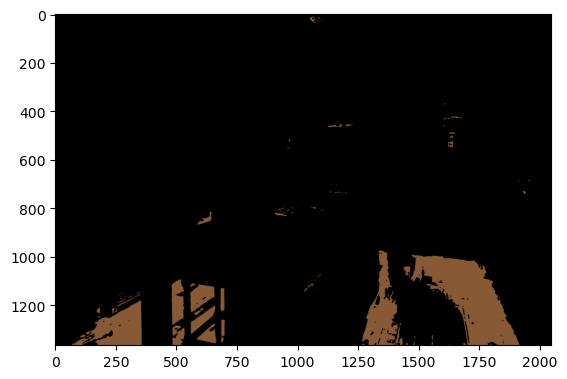

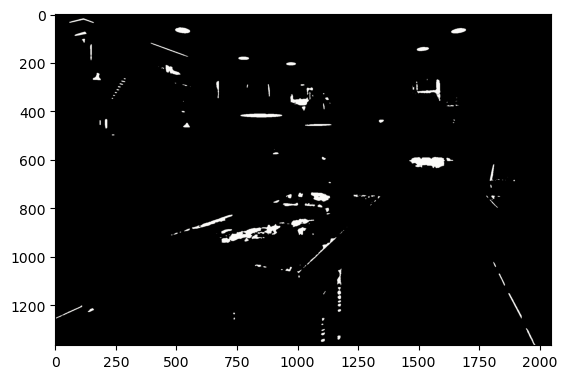

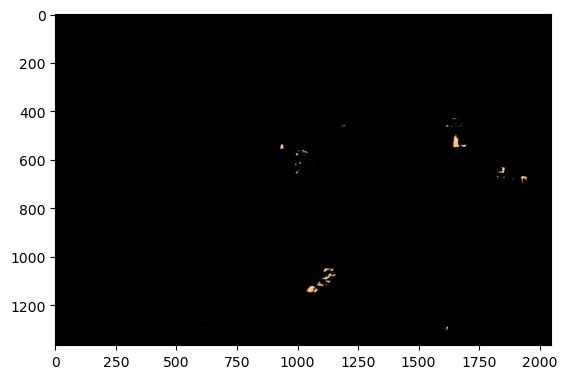

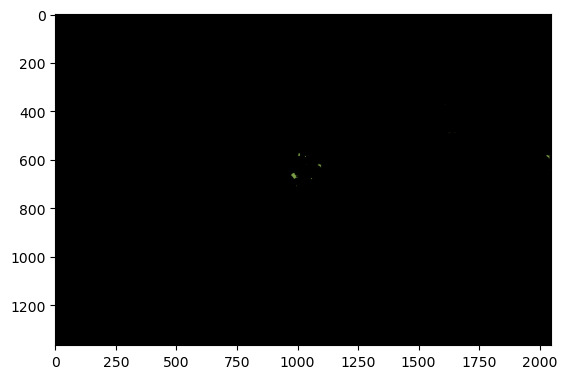

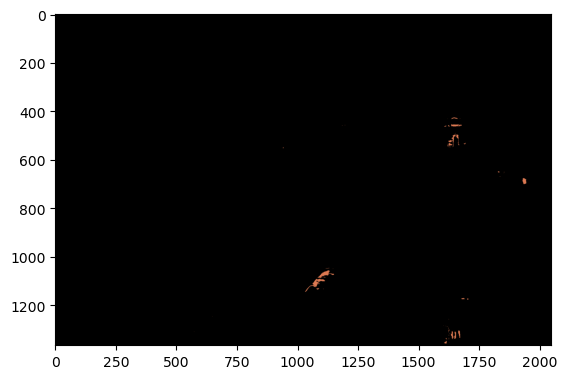

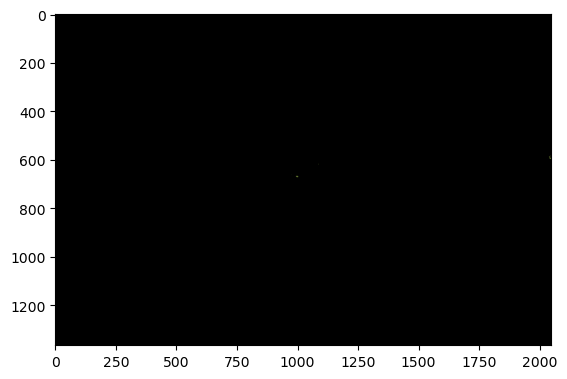

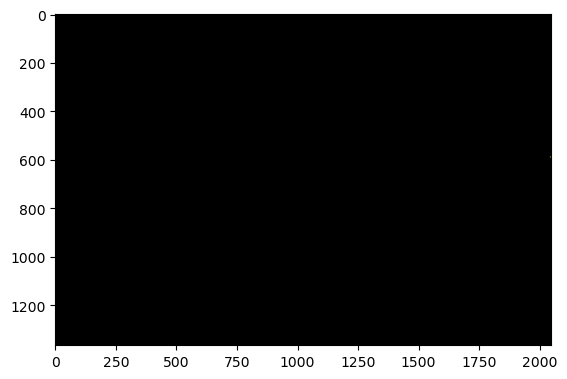

In [ ]:
for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    cluster_int8[label]

result=result.reshape(img.shape)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()
    

## Mean shift (Dataset Titanic)

El 15 de abril de 1912, el Titanic chocó contra un iceberg y se hundió. Cuando el Titanic se hundió, murieron 1.502 de los 2.224 pasajeros y tripulantes. En esta sección, aplicará la agrupación Mean-Shift en características como edad, género, clase, etc. Luego determinaremos si existe una relación entre la supervivencia y los diferentes grupos. La siguiente tabla resume los datos:

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>


In [60]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Podemos eliminar las siguientes columnas 'Nombre', 'Boleto', 'Cabina', 'PassengerId', 'Embarked' para simplificar.

In [62]:
df2 = df.copy()

In [63]:
df2=df2.drop(columns = ['Name','Ticket','Cabin','PassengerId','Embarked']) #TODO 

Asignaremos `0` al sexo `femenino` y `1` al sexo `masculino`, lo que se conoce como binarización de características.

In [64]:
mapping = {'female': 0, 'male': 1}

In [65]:
df2['Sex'] = df2['Sex'].map(mapping)

In [66]:
#Otra forma de hacerlo
"""df.loc[df['Sex']!='male','Sex']=0
df.loc[df['Sex']=='male','Sex']=1"""

"df.loc[df['Sex']!='male','Sex']=0\ndf.loc[df['Sex']=='male','Sex']=1"

In [67]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


Comprobaremos si faltan valores.

In [68]:
df2.isna().sum()#TODO 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Aquí, reemplazamos los valores faltantes en edad, con la edad promedio.

In [70]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [72]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


Asignaremos el marco de datos a `X`, para agruparlo, y eliminaremos nuestro objetivo, la columna `Survived`.

In [73]:
X=df2.drop(columns=['Survived'])

Ahora estandarizaremos los datos X.

In [74]:
X=df2.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

Para aplicar el algoritmo de desplazamiento medio a X, primero use la función `estimate_bandwidth()` para estimar el valor del parámetro de ancho de banda. Luego crea un objeto `MeanShift` y ajústalo a `X`:

In [ ]:
bandwidth =estimate_bandwidth(X) #TODO 
ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True) #TODO 
ms.fit(X) #TODO 

A continuación, agregamos los grupos al conjunto de datos para su análisis.

In [83]:
df2['cluster']=ms.labels_

Ahora, agrupamos por grupos para ver que ciertos grupos tienen mayores posibilidades de sobrevivir.

In [94]:
grouped_df = df2.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)
grouped_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
cluster,,,,,,,
5,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200
4,0.750000,1.000000,0.285714,27.822048,0.857143,1.250000,195.894643
0,0.381313,2.313131,0.676768,30.734477,0.285354,0.199495,23.992865
3,0.307692,2.846154,0.153846,38.692308,0.769231,4.230769,29.377562
1,0.260870,2.913043,0.500000,8.745575,3.239130,1.543478,30.968026
2,0.000000,3.000000,0.571429,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,1.000000,61.000000,0.500000,3.000000,188.137500


In [92]:
grouped_df2 = df2.groupby('cluster').count().sort_values(by=['Survived'], ascending=False)
grouped_df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
cluster,,,,,,,
0,792,792,792,792,792,792,792
1,46,46,46,46,46,46,46
4,28,28,28,28,28,28,28
3,13,13,13,13,13,13,13
2,7,7,7,7,7,7,7
5,3,3,3,3,3,3,3
6,2,2,2,2,2,2,2


In [ ]:
dict = grouped_df['Survived'] * grouped_df2['Survived']

In [95]:
# Supongamos que tienes dos DataFrames df1 y df2 con columnas 'Survived' e 'cluster' como índice

# Realiza una fusión (merge) basada en el índice 'cluster'
merged_df = grouped_df.merge(grouped_df2, left_index=True, right_index=True, suffixes=('_df1', '_df2'))

# Multiplica las columnas 'Survived_df1' y 'Survived_df2' y guarda el resultado en una nueva columna
merged_df['result'] = merged_df['Survived_df1'] * merged_df['Survived_df2']

# merged_df ahora contiene la columna 'result' que es el producto de 'Survived' en ambas tablas

In [ ]:
merged_df['result']

In [ ]:
fill_n_survived = lambda g: g.fillna(g.mean()*g.count())
df2.groupby('cluster').apply(fill_n_survived)

En la tabla anterior, vemos que hay `7` grupos generados por el análisis de cambio medio, cada grupo contiene el porcentaje promedio de sobrevivientes.

Por ejemplo, el cluster `5`, tiene el `100 %` de supervivientes, con una edad media de `35,3` años, pasajeros pertenecientes a `1ª clase` y los pasajeros que pagaron la tarifa más alta, `512,33` por billete. Curiosamente, el Clúster `6`, tiene un `0 %` de supervivientes, con una edad media de `61 años`, pertenecientes también a la `1ª clase` y en la tarifa media del billete. No es sorprendente que las mayores probabilidades de supervivencia las tuvieran los grupos de pasajeros más jóvenes y ricos.

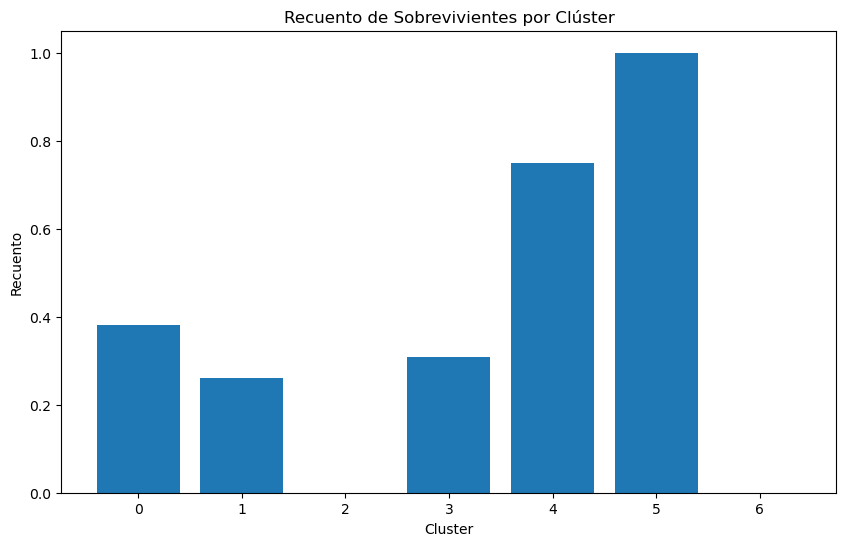

In [98]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['result'].index, grouped_df['Survived'])
plt.xlabel('Cluster')
plt.ylabel('Recuento')
plt.title('Recuento de Sobrevivientes por Clúster')
plt.xticks(merged_df['result'].index)
plt.show()